0. 參數初始化

In [8]:
import matplotlib.pyplot as plt
import csv, os
os.chdir("C:/Serious/Program/Github/noodle_LLM/")

round_list = ["A", "B"]
dir_data_source = "./training/LLM_eval/evalOutput/"
dir_output = "./training/LLM_eval/graphOutput/"





# A
"lora_type2-8-50E64B_A",
"lora_type2-8-100E64B_A",
"lora_type2-128-50E64B_A",
"lora_type2-128-100E64B_A",
"lora_type2-256-50E64B_A",
"lora_type2-256-100E64B_A",
"lora_type3-256-100E32B_A",
"lora_type3-256-100E64B_A_old",
"lora_type3-256-100E64B_2_A",
"lora_type3-256-100E128B_A",
"lora_type3-256-150E32B_A",
"lora_type3-256-200E32B_A",
"lora_type3-256-200E64B_A",
"lora_type3-256-200E128B_A",
"lora_type3-256-200E128B_2_A",
"lora_type3-256-300E32B_A",
"lora_type3-256-300E64B_A",
"lora_type3-256-300E128B_A",
# B
"lora_type2-8-50E64B_B",
"lora_type2-8-100E64B_B",
"lora_type2-128-50E64B_B",
"lora_type2-128-100E64B_B",
"lora_type2-256-50E64B_B",
"lora_type2-256-100E64B_B",
"lora_type3-256-100E32B_B",
"lora_type3-256-100E64B_B_old",
"lora_type3-256-100E64B_2_B",
"lora_type3-256-100E128B_B",
"lora_type3-256-150E32B_B",
"lora_type3-256-200E32B_B",
"lora_type3-256-200E64B_B",
"lora_type3-256-200E128B_B",
"lora_type3-256-200E128B_2_B",
"lora_type3-256-300E32B_B",
"lora_type3-256-300E64B_B",
"lora_type3-256-300E128B_B",


###
the_name = "tmp_all_B"

models = [
"lora_type3-256-100E32B_B",
"lora_type3-256-100E64B_B_old",
"lora_type3-256-100E64B_2_B",
"lora_type3-256-100E128B_B",
"lora_type3-256-150E32B_B",
"lora_type3-256-200E32B_B",
"lora_type3-256-200E64B_B",
"lora_type3-256-200E128B_B",
"lora_type3-256-200E128B_2_B",
"lora_type3-256-300E32B_B",
"lora_type3-256-300E64B_B",
"lora_type3-256-300E128B_B",
]
###

 1. 製圖初始化

In [9]:

def graph_maker(accuracy, graph_name):
    # 設置字體
    plt.rcParams["font.family"] = "Times New Roman"
    # 設置顏色
    color_mapping = {
        "GPT-3.5-turbo": (135 / 255, 206 / 255, 250 / 255),
        "Gemini Pro": (144 / 255, 238 / 255, 144 / 255),
        "Taiwan-LLM": (240 / 255, 150 / 255, 150 / 255),
    }

    colors = []
    for model in models:
        if "GPT" in model:
            colors.append(color_mapping["GPT-3.5-turbo"])
        elif "Gemini" in model:
            colors.append(color_mapping["Gemini Pro"])
        elif "lora" in model:
            colors.append(color_mapping["Taiwan-LLM"])

   
    

    # 繪製水平長條圖
    plt.figure(figsize=(14, 6))
    plt.barh(models, accuracy, color=colors)
    plt.xlabel("F1 score")
    plt.title(graph_name)
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    plt.gca().invert_yaxis()

    # 顯示每個長條的數值
    for index, value in enumerate(accuracy):
        plt.text(value, index, f"{value:.4f}", va="center", ha="left")

    plt.tight_layout()

    # 使用Python檔案名稱生成PDF文件名稱
    output_filename = f"{dir_output}{graph_name}"
    plt.savefig(f"{output_filename}.png", format="png")



def find_csv(target):
    csv_file_path = [f"{dir_data_source}{target}_A.csv", f"{dir_data_source}{target}_B.csv"]
    return csv_file_path
    

2. BLEU 製圖

In [10]:
def bleu_graph(output_name):

    csv_file_path = find_csv("BLEU")

    ori_data = {}
    for i in csv_file_path:
        with open(i, mode="r", encoding="utf-8") as csvfile:
            csv_reader = csv.DictReader(csvfile)
            for row in csv_reader:
                ori_data[row["model_name"]] = (row["BLEU"])
    
    accuracy = []
    for i in models:
        accuracy.append(eval(ori_data[i]))
    graph_maker(accuracy, f"{output_name}_BLEU_F1-score")

3. ROUGE 製圖

In [11]:
def rouge_graph(output_name):
    csv_file_path = find_csv("ROUGE")

    ori_data = {}
    for i in csv_file_path:
        with open(i, mode="r", encoding="utf-8") as csvfile:
            csv_reader = csv.DictReader(csvfile)
            for row in csv_reader:
                ori_data[row["model_name"]] = (row["rouge-1"], row["rouge-2"], row["rouge-l"], row["Average"])
            
            # rouge-1,rouge-2,rouge-l,Average

    rouge_1 = []
    rouge_2 = []
    rouge_l = []
    Average = []
    for i in models:
        rouge_1.append(eval(ori_data[i][0]))
        rouge_2.append(eval(ori_data[i][1]))
        rouge_l.append(eval(ori_data[i][2]))
        Average.append(eval(ori_data[i][3]))

    graph_maker(rouge_1, f"{output_name}_ROUGE_1_F1-score")
    graph_maker(rouge_2, f"{output_name}_ROUGE_2_F1-score")
    graph_maker(rouge_l, f"{output_name}_ROUGE_l_F1-score")
    graph_maker(Average, f"{output_name}_Average_F1-score")

4. Sentence Transformers Semantic Similarity 製圖

In [12]:
def st_graph(output_name):
    csv_file_path = find_csv("ST")

    
    ori_data = {}
    for i in csv_file_path:
        with open(i, mode="r", encoding="utf-8") as csvfile:
            csv_reader = csv.DictReader(csvfile)
            for row in csv_reader:
                ori_data[row["model_name"]] = (row["ST"])

            
    accuracy = []
    for i in models:
        accuracy.append(eval(ori_data[i]))
    graph_maker(accuracy, f"{output_name}_ST_F1-score")

5. 延遲製圖

In [13]:
def latency_graph(output_name):
    csv_file_path = find_csv("LATENCY")

    ori_data = {}
    for i in csv_file_path:
        with open(i, mode="r", encoding="utf-8") as csvfile:
            csv_reader = csv.DictReader(csvfile)
            for row in csv_reader:
                ori_data[row["model_name"]] = (row["LATENCY"])

            
    accuracy = []
    for i in models:
        accuracy.append(eval(ori_data[i]))
    graph_maker(accuracy, f"{output_name}_LATENCY")

6. 製圖選項

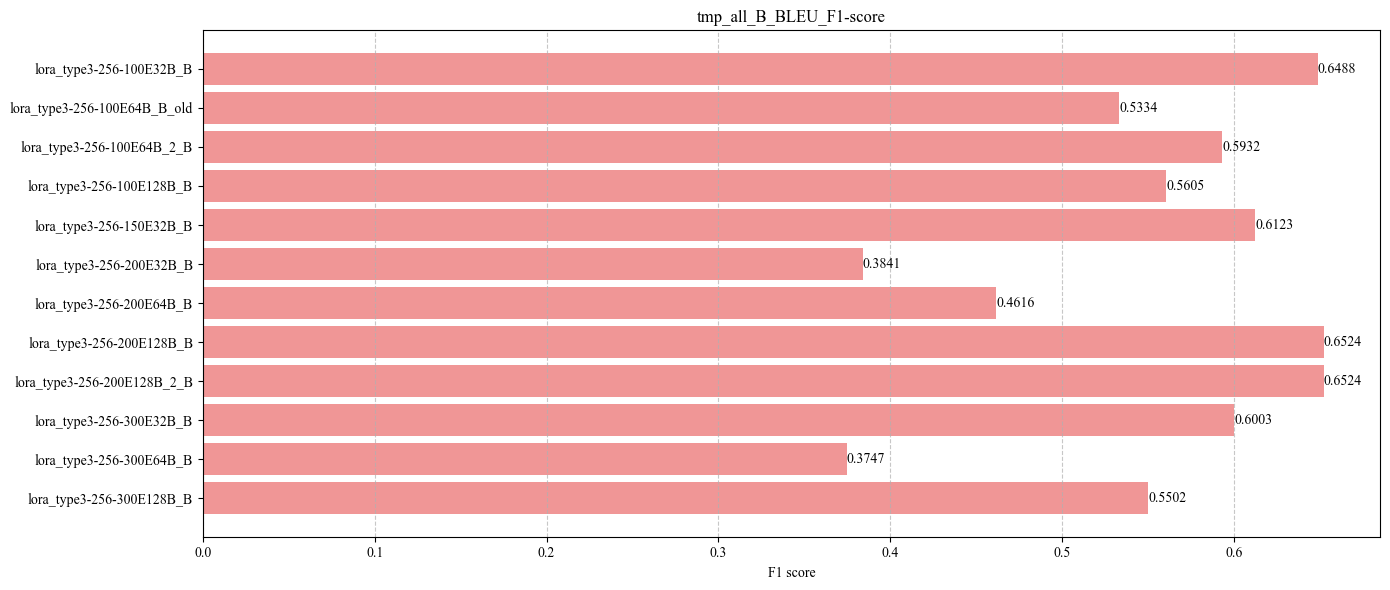

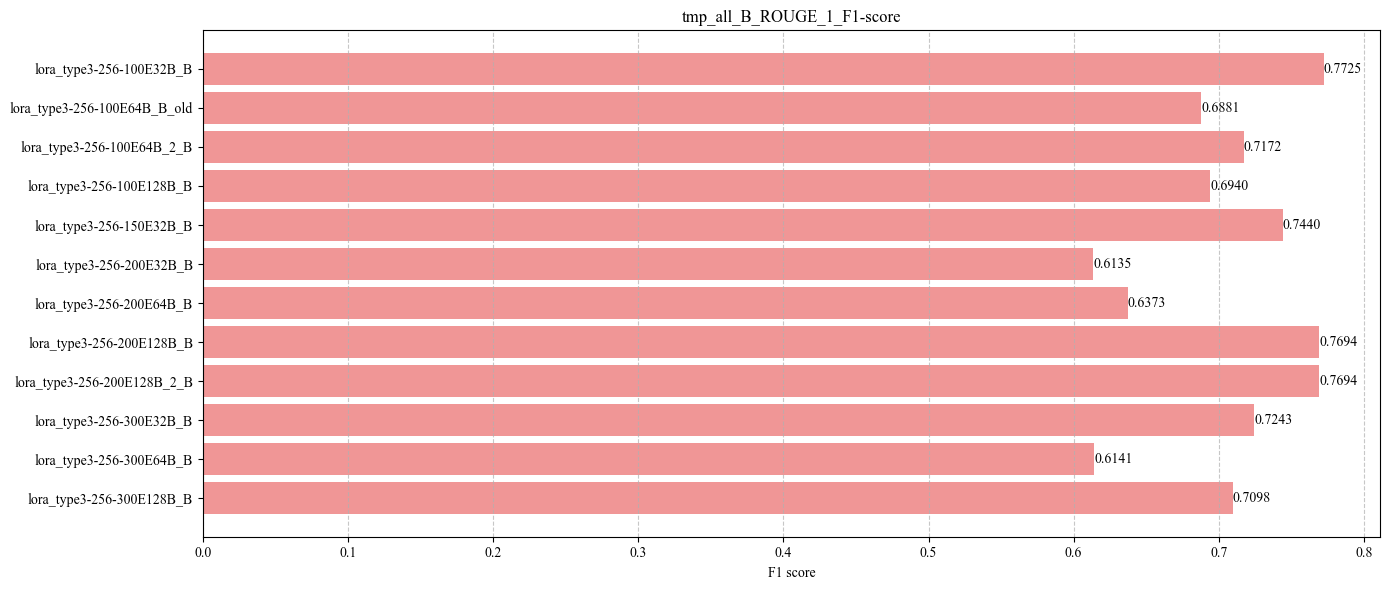

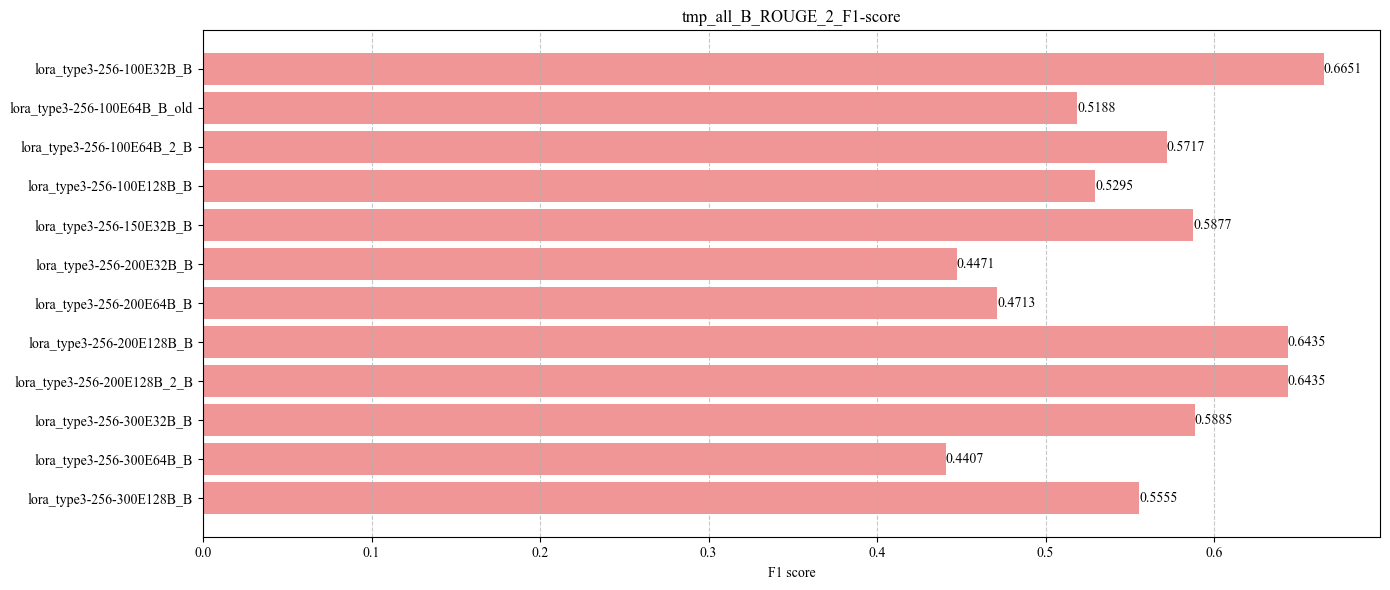

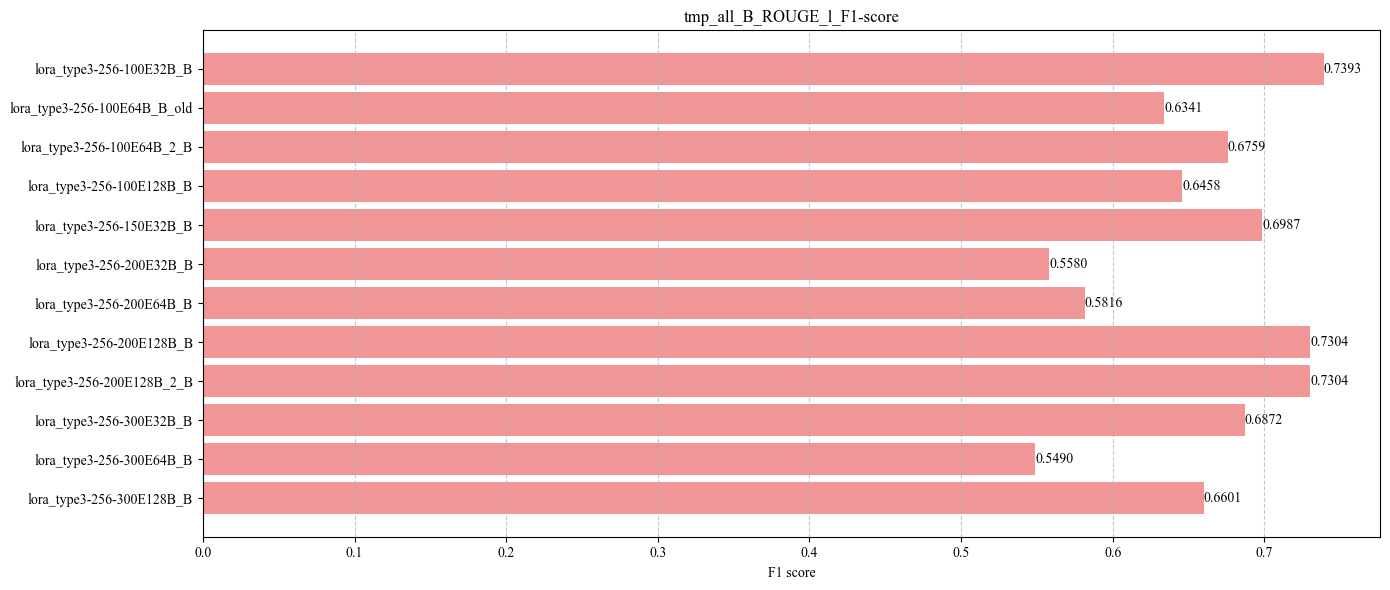

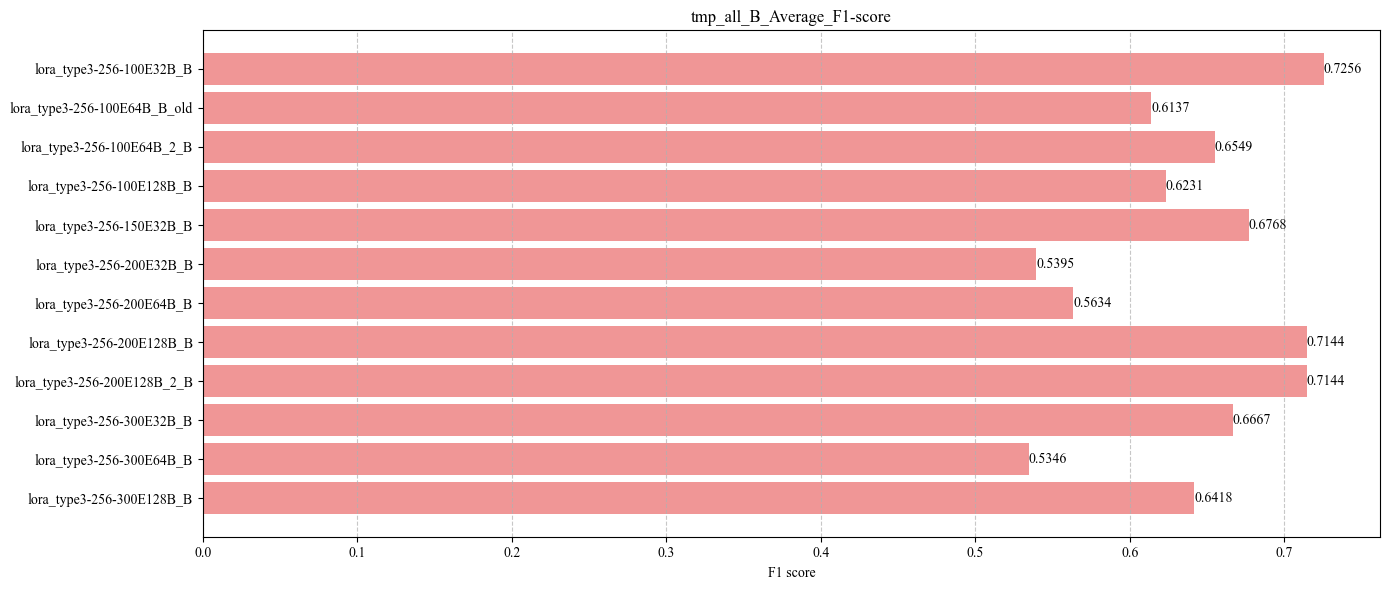

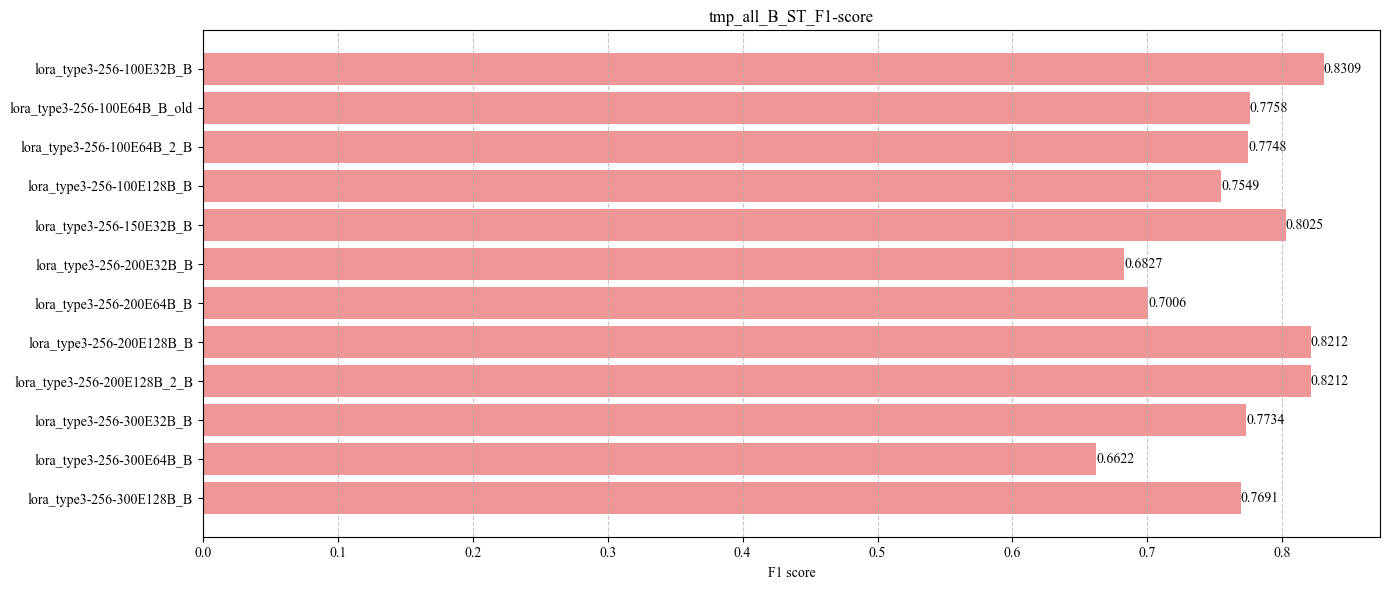

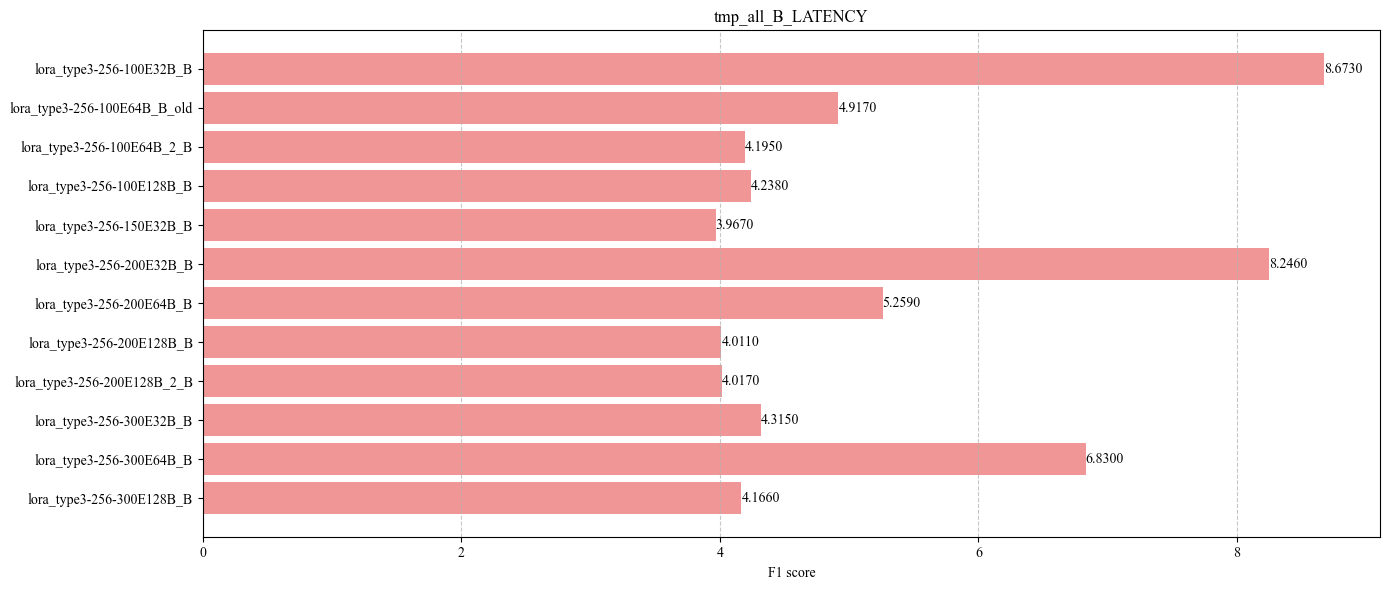

In [14]:
bleu_graph(the_name)
rouge_graph(the_name)
st_graph(the_name)
latency_graph(the_name)
